In [1]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import numpy as np
from WeakLearners import WongNeuralNetCIFAR10
import matplotlib.pyplot as plt
import os

In [2]:
!pip install pytorch_memlab

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from Boosting import Ensemble, runBoosting
from AdversarialAttacks import attack_fgsm, attack_pgd
from pytorch_memlab import LineProfiler

In [4]:
import utils

In [5]:
cuda = torch.device('cuda:0')

In [6]:
%load_ext autoreload
%autoreload 2

## CIFAR10 Boosting (Adversarial)

In [7]:
# maxSamples_vals = [100000, 200000, 500000]
# maxSamples_vals = [500000]
maxSamples_vals = [500000, 1000000]
# done for 50K, 100K
# maxSamples_vals = [1000000, 2000000]
# maxSamples_vals = [123456]
batch_size=100
# maxSamples_vals = [batch_size + 1]

In [8]:
num_wl = 20 # maybe around 100? #later: maybe change this to an array?
num_epochs = 1

In [9]:
ensembles = []
epsilons = [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]
train_eps_nn = 0
# epsilons = []
# epsilons = [0.0, 0.01]

In [10]:
# from Boosting import SchapireWongMulticlassBoosting
# from AdversarialAttacks import attack_fgsm
# # Ensemble.record_accuracies, Ensemble.calc_accuracies, attack_fgsm, Ensemble.schapireContinuousPredict
# with LineProfiler(runBoosting, SchapireWongMulticlassBoosting, WongNeuralNetCIFAR10.fit, WongNeuralNetCIFAR10.batchUpdate) as prof:
#     for i in range(len(maxSamples_vals)):
#         maxSamples = maxSamples_vals[i]
#         ensemble = runBoosting(num_wl, maxSamples, dataset=datasets.CIFAR10, weakLearnerType = WongNeuralNetCIFAR10, val_attacks = [attack_fgsm], 
#                                    attack_eps_nn=epsilons, attack_eps_ensemble=epsilons, train_eps_nn=8, adv_train=True, batch_size=batch_size)
#         ensembles.append(ensemble)
#         path_head = 'results/plots/cifar10/'
#         acc_file = path_head + f'acc_maxSamples_{maxSamples}.png'
#         adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
#         loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
#         wl_train_acc_file = path_head + f'wl_train_acc_maxSamples_{maxSamples}.png'
#         ensemble.plot_accuracies(acc_file)
#         ensemble.plot_loss(loss_file)
#         ensemble.plot_adversarial_accuracies(adv_acc_file)
#         ensemble.plot_wl_train_acc(wl_train_acc_file)
# prof.display()

len(maxSamples_vals): 2
maxSamples: 500000
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
attack eps ens [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]
weakLearners before super call: []
weakLearners after super call: []
cnt:  20
t: 0
cnt2: 1
----------------------------------------------------------------------------------------------------
Training weak learner 0
adv_train: True
Epoch 0


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/cifar.py:118: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  img, target = self.data[index], self.targets[index]


about to record accs [<function attack_fgsm at 0x7fd03183b048>]
about to attack <function attack_fgsm at 0x7fd03183b048>
losses, accs {'val': 2.0699312686920166, <function attack_fgsm at 0x7fd03183b048>: [2.0699312686920166, 2.2573635578155518, 2.3942747116088867, 2.494633674621582, 2.6230242252349854, 2.741337537765503]} {'val': 0.21, <function attack_fgsm at 0x7fd03183b048>: [0.21, 0.03, 0.02, 0.02, 0.0, 0.0]}
Val accuracy: 0.21
Progress: 10000,  val accuracy: 0.2100
about to record accs [<function attack_fgsm at 0x7fd03183b048>]
about to attack <function attack_fgsm at 0x7fd03183b048>
losses, accs {'val': 1.737918496131897, <function attack_fgsm at 0x7fd03183b048>: [1.737918496131897, 1.9324535131454468, 2.0958707332611084, 2.2323288917541504, 2.44197678565979, 2.734360456466675]} {'val': 0.38, <function attack_fgsm at 0x7fd03183b048>: [0.38, 0.22, 0.15, 0.11, 0.06, 0.01]}
Val accuracy: 0.38
Progress: 20000,  val accuracy: 0.3800
about to record accs [<function attack_fgsm at 0x7fd0

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:893: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


Epoch 1
about to record accs [<function attack_fgsm at 0x7fd03183b048>]
about to attack <function attack_fgsm at 0x7fd03183b048>
losses, accs {'val': 1.24904465675354, <function attack_fgsm at 0x7fd03183b048>: [1.24904465675354, 1.5386412143707275, 1.8324956893920898, 2.1138112545013428, 2.611330032348633, 3.4561028480529785]} {'val': 0.52, <function attack_fgsm at 0x7fd03183b048>: [0.52, 0.37, 0.31, 0.27, 0.13, 0.05]}
Val accuracy: 0.52
Progress: 60000,  val accuracy: 0.5200
about to record accs [<function attack_fgsm at 0x7fd03183b048>]
about to attack <function attack_fgsm at 0x7fd03183b048>
losses, accs {'val': 1.1742318868637085, <function attack_fgsm at 0x7fd03183b048>: [1.1742318868637085, 1.471476435661316, 1.7838624715805054, 2.092327356338501, 2.6533396244049072, 3.623258590698242]} {'val': 0.52, <function attack_fgsm at 0x7fd03183b048>: [0.52, 0.44, 0.34, 0.23, 0.18, 0.09]}
Val accuracy: 0.52
Progress: 70000,  val accuracy: 0.5200
about to record accs [<function attack_fgsm 

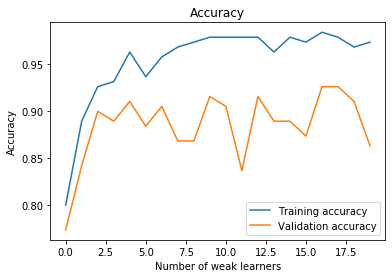

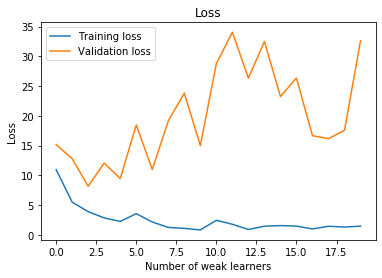

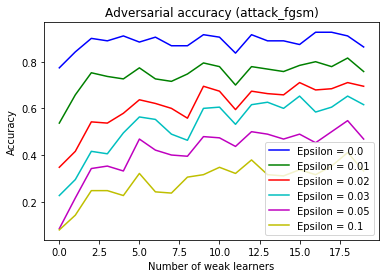

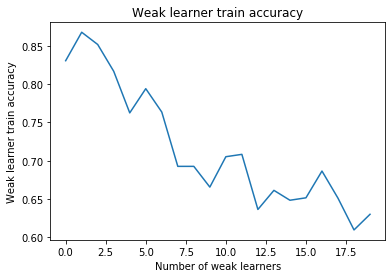

len(maxSamples_vals): 2
maxSamples: 1000000
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
attack eps ens [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]
weakLearners before super call: []
weakLearners after super call: []
cnt:  20
t: 0
cnt2: 1
----------------------------------------------------------------------------------------------------
Training weak learner 0
adv_train: True
Epoch 0
about to record accs [<function attack_fgsm at 0x7fd03183b048>]
about to attack <function attack_fgsm at 0x7fd03183b048>
losses, accs {'val': 2.056094169616699, <function attack_fgsm at 0x7fd03183b048>: [2.056094169616699, 2.2392024993896484, 2.3724799156188965, 2.4698355197906494, 2.5946762561798096, 2.704793930053711]} {'val': 0.27, <function attack_fgsm at 0x7fd03183b048>: [0.27, 0.04, 0.01, 0.01, 0.01, 0.01]}
Val accuracy: 0.27
Progress: 10000,  val accuracy: 0.2700
about to record accs [<function attack_

AssertionError: 

In [11]:
# from Boosting import SchapireWongMulticlassBoosting
from AdversarialAttacks import attack_fgsm
import gc
# Ensemble.record_accuracies, Ensemble.calc_accuracies, attack_fgsm, Ensemble.schapireContinuousPredict
for i in range(len(maxSamples_vals)):
    print("len(maxSamples_vals):", len(maxSamples_vals))
    maxSamples = maxSamples_vals[i]
    print("maxSamples:", maxSamples)
    ensemble = runBoosting(num_wl, maxSamples, dataset=datasets.CIFAR10, weakLearnerType = WongNeuralNetCIFAR10, val_attacks = [attack_fgsm], 
                               attack_eps_nn=epsilons, attack_eps_ensemble=epsilons, train_eps_nn=train_eps_nn, adv_train=True, batch_size=batch_size)
    print("number of wl in ensemble:", len(ensemble.weakLearners))
    ensembles.append(ensemble)
    gc.collect()
#     for obj in gc.get_objects():
#         try:
#             if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
#                 print(type(obj), obj.size())
#         except:
#             pass
    
    path_head = f'results/plots/cifar10/train_eps_{train_eps_nn}/'
    try:
        os.mkdir(path_head)
    except OSError:
        pass
    acc_file = path_head + f'acc_maxSamples_{maxSamples}.png'
    adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
    loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
    wl_train_acc_file = path_head + f'wl_train_acc_maxSamples_{maxSamples}.png'
    ensemble.plot_accuracies(acc_file)
    ensemble.plot_loss(loss_file)
    ensemble.plot_adversarial_accuracies(adv_acc_file)
    ensemble.plot_wl_train_acc(wl_train_acc_file)


In [ ]:
# for maxSamples in maxSamples_vals:
#         ensemble = runBoosting(num_wl, maxSamples, dataset=datasets.CIFAR10, weakLearnerType = WongNeuralNetCIFAR10, val_attacks = [attack_fgsm], 
#                                attack_eps_nn=epsilons, attack_eps_ensemble=epsilons, train_eps_nn=8, adv_train=True)
#         ensembles.append(ensemble)

In [ ]:
ensembles[0].plot_adversarial_accuracies()

In [ ]:
ensembles[0].plot_train_loss()
ensembles[0].plot_val_loss()
ensembles[0].plot_train_accuracies()
ensembles[0].plot_val_accuracies()

In [10]:
ensembles[0].attack_eps

[]